# **Propuesta 1: *Red compleja de síntomas***

Red formada por diferentes síntomas que puede presentar una persona. Los datos se obtienen a partir de realizar el proceso de *scraping* sobre la página https://www.medicinenet.com/symptoms_and_signs/alpha_a.htm. Para la creación de la red, se considera que:
1. Los nodos son los diferentes *síntomas* que puede presentar una persona.
2. Las aristas que unen los síntomas son las *enfermedades* que comparten los síntomas presentados.

De esta manera, supongamos que tenemos las siguientes enfermedades con sus respectivos síntomas: 

1. **Cyst**: Abdominal Lump

2. **Sprains and Strains**: Arm pain, Abdominal Pain, Ankle Pain

3. **Abdominal Aortic Aneurysm**: Abdominal Pain, Abdominal Lump

El grafo resultante sería: 

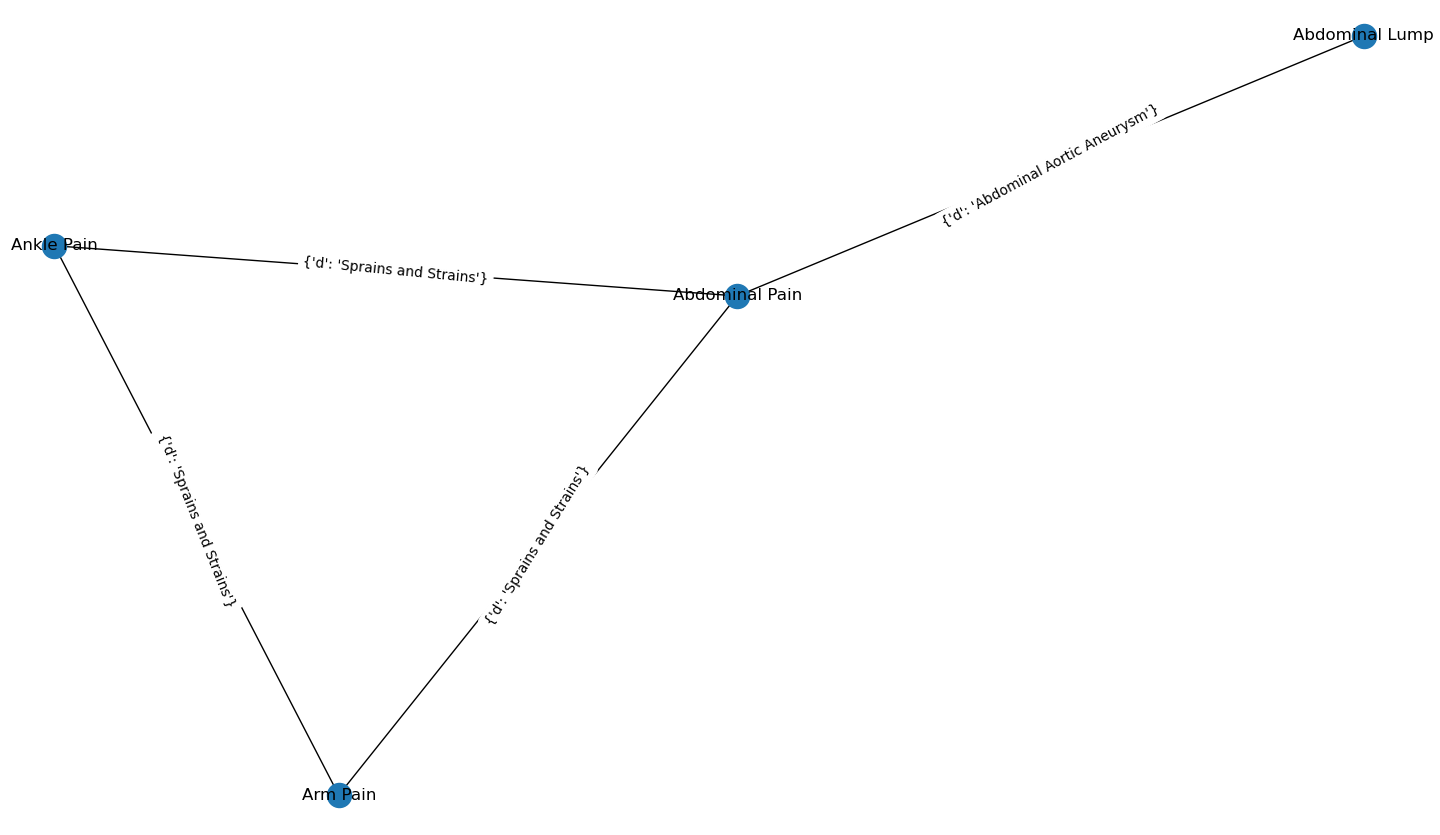

In [1]:
from IPython.display import Image
Image("diseases_example_graph.png")

Observemos que la enfermedad *Cyst* no aparece debido a que sólo se dispone de un único síntoma (*Abdominal Lump*).

Carguemos las librerías necesarias.

In [1]:
import networkx as nx
import ast
from itertools import combinations

Los datos recopilados mediante el proceso de <i>scraping</i> se han guardado en el fichero <b>diseases.txt</b>. A continuación vamos a crear un diccionario donde se guarde el contenido de este fichero. Los <i>keys</i> del diccionario son las diferentes enfermedades, y los valores son las listas de síntomas correspondientes a cada enfermedad.

In [116]:
file = open("diseases.txt", "r")

contents = file.read()
contents_aux = contents.strip()
diseases = ast.literal_eval(contents_aux)
file.close()

Comprobamos ahora si el diccionario se ha creado correctamente.

In [133]:
len(diseases.keys())
        
for disease in diseases:
    if len(diseases[disease]) > 100:
        print(f"{disease} has a total of {len(diseases[disease])} symptoms. \n")

Lyme Disease has a total of 114 symptoms. 

Type 2 Diabetes has a total of 154 symptoms. 

Transient Ischemic Attack  has a total of 114 symptoms. 

Drug Interactions has a total of 296 symptoms. 

Irritable Bowel Syndrome  has a total of 314 symptoms. 

Constipation has a total of 280 symptoms. 

Hematoma has a total of 186 symptoms. 

Bruises has a total of 186 symptoms. 

Gastroenteritis  has a total of 174 symptoms. 

Intestinal Gas  has a total of 160 symptoms. 

Abuse, Trauma, and Mental Health has a total of 106 symptoms. 

Labyrinthitis  has a total of 184 symptoms. 

Exercise has a total of 156 symptoms. 



In [159]:
def create_symptoms_graph():
    G = nx.Graph()
    for disease in diseases:
        symptoms = diseases[disease]
        if len(symptoms) >= 2 and len(symptoms) < 50:
            disease_name = disease.strip()
            disease_name = disease_name.replace(', ', '_')
            disease_name = disease_name.replace(' ', '_')
            for (symptom1,symptom2) in combinations(symptoms, 2):
                if not symptom1 in G:
                    G.add_node(symptom1, symptom=symptom1)
                if not symptom2 in G:
                    G.add_node(symptom2, symptom=symptom2)
                if not G.has_edge(symptom1, symptom2) and not G.has_edge(symptom2, symptom1):
                    G.add_edge(symptom1, symptom2, d=[disease], weight=1)
                else:
                    G[symptom1][symptom2]['weight'] = G[symptom1][symptom2]['weight'] + 1
                    G[symptom1][symptom2]['d'].append(disease)
    return G

Ahora, creemos el gráfo equivalente al diccionario. Recordemos que los nodos del grafo son los síntomas, y las aristas las enfermedades que unen dos o más síntomas.

In [160]:
G = create_symptoms_graph()

Comprobemos que se ha creado correctamete el grafo:

In [161]:
G.number_of_edges()

21708

In [162]:
G.number_of_nodes()

1501

In [163]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1501
Number of edges: 21708
Average degree:  28.9247


Eliminemos ahora cualquier bucle existente del grafo:

In [164]:
G.remove_edges_from(nx.selfloop_edges(G))

Comprobemos si se ha modificado la estructura del grafo:

In [165]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1501
Number of edges: 21670
Average degree:  28.8741


El grafo tiene menos aristas. Veamos ahora si se trata de un grafo conexo. 

In [166]:
nx.is_connected(G)

False

El grafo no es conexo. Dibujemos el grafo para observar la estructura que tiene.

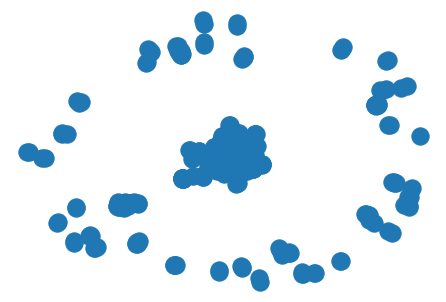

In [167]:
nx.draw_spring(G)

Se puede obsevar que hay unos 4 grandes agrupaciones de nodos. Veamos las partes conexas del grafo.

In [168]:
cc = list(nx.connected_components(G))

In [169]:
len(cc) 

42

Existen 17 subgrafos conexos. Veamos la estructura de cada uno en concreto:

In [170]:
def get_subgraph(G, cc):
    i = 1
    for c in cc:
        subG = nx.subgraph(G, c)
        print(f"Subgrafo {i}: \n {nx.info(subG)}")
        #nx.draw_spring(subG)
        print("__________________\n")
        i = i + 1

In [171]:
get_subgraph(G, cc)

Subgrafo 1: 
 Name: 
Type: Graph
Number of nodes: 1345
Number of edges: 21396
Average degree:  31.8156
__________________

Subgrafo 2: 
 Name: 
Type: Graph
Number of nodes: 35
Number of edges: 118
Average degree:   6.7429
__________________

Subgrafo 3: 
 Name: 
Type: Graph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000
__________________

Subgrafo 4: 
 Name: 
Type: Graph
Number of nodes: 3
Number of edges: 3
Average degree:   2.0000
__________________

Subgrafo 5: 
 Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
__________________

Subgrafo 6: 
 Name: 
Type: Graph
Number of nodes: 11
Number of edges: 16
Average degree:   2.9091
__________________

Subgrafo 7: 
 Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
__________________

Subgrafo 8: 
 Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000
__________________

Subgrafo 9: 
 Name: 
Type: Graph
Number of nodes: 4
Number o

Podemos ver que los subgrafos más grandes son el segundo y el primero, respecitvamente.

## Subgrafo 1

In [172]:
G1 = subG = nx.subgraph(G, cc[0])

In [173]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 1345
Number of edges: 21396
Average degree:  31.8156


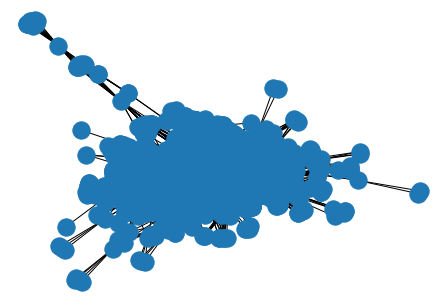

In [174]:
nx.draw_spring(G1)

Analicemos el subgrafo 1.

In [175]:
nx.is_connected(G1)

True

In [176]:
nx.diameter(G1) 

8

In [177]:
list(nx.articulation_points(G1))

['Bruising or discoloration, Inability to move, Joint instability and Joint pain',
 'Bleeding, Red colored vomit, purging, Irregular periods',
 'Bloating, Frequent urination and Pressure or fullness',
 'Bleeding and Eyelid redness',
 'Blurred vision, Fever, Headache (worst ever) and Lack of emotion',
 'Blood or red colored urine and Nausea or vomiting',
 'Belching, Diarrhea and Excessive gas',
 'Bloating, Diarrhea and Stomach cramps',
 'Blue colored skin, Lump or bulge, Numbness or tingling and Swelling',
 'Broken bone (single fracture), Numbness or tingling and Swelling',
 'Bleeding and Swollen tongue',
 'Blue colored skin and Skin bumps',
 'Bumps on Skin',
 'Bone Loss (Osteopenia)']

In [178]:
list(nx.bridges(G1))

[('Bleeding, Bruising or discoloration, Inability to move and Lump or bulge',
  'Bruising or discoloration, Inability to move, Joint instability and Joint pain'),
 ('Bumps on Skin', 'Bruising and Unusual or suspicious mole'),
 ('Bumps on Skin',
  'Bruising or discoloration, Cold feet, Pain or discomfort and Tenderness to touch'),
 ('Broken bone (single fracture), Numbness or tingling and Swelling',
  'Blue colored skin, Lump or bulge, Numbness or tingling and Swelling'),
 ('Blue colored skin, Lump or bulge, Numbness or tingling and Swelling',
  'Bruising or discoloration, Bulging veins, Lump or bulge and Numbness or tingling')]

In [179]:
nx.clustering(G1) # coef. alto -> personajes que intervienen en un triangulo

{'Bad breath, Change in vision, Depressed mood and Dry mouth': 0.4024435394298408,
 'Binge drinking, Excessive body hair growth, Fatigue, Hunger': 0.492436974789916,
 'Blackouts (memory time loss), Depressed mood, Fits of rage and Headache': 0.5462304409672831,
 'Blackouts, Depressed mood, insomnia, Flashbacks': 0.4838709677419355,
 'Blank stare, Depressed mood, Flashbacks and Headache (worst ever)': 0.4947089947089947,
 'Bleeding, Body aches or pains, Depressed mood and Headache': 0.5462304409672831,
 'Bleeding, Depressed mood, Emotional detachment and Flashbacks': 0.4987179487179487,
 'Blinking eyes, Confusion, Depressed mood and Difficulty sleeping': 0.541871921182266,
 'Blinking eyes, Difficulty falling asleep, insomnia and Staying asleep': 0.6482213438735178,
 'Blinking eyes, Jaw Clicking, Coated tongue and Depressed mood': 0.563076923076923,
 'Bloating or fullness, Constipation, Difficulty sleeping and Early morning waking': 1.0,
 'Bloating or fullness, Depressed mood, Distended 

In [180]:
nx.transitivity(G1) # no es aleatoria, es red social

0.6219146998194283

In [181]:
degs = nx.centrality.degree_centrality(G1)

In [182]:
degs

{'Bad breath, Change in vision, Depressed mood and Dry mouth': 0.05505952380952381,
 'Binge drinking, Excessive body hair growth, Fatigue, Hunger': 0.026041666666666664,
 'Blackouts (memory time loss), Depressed mood, Fits of rage and Headache': 0.02827380952380952,
 'Blackouts, Depressed mood, insomnia, Flashbacks': 0.02306547619047619,
 'Blank stare, Depressed mood, Flashbacks and Headache (worst ever)': 0.020833333333333332,
 'Bleeding, Body aches or pains, Depressed mood and Headache': 0.02827380952380952,
 'Bleeding, Depressed mood, Emotional detachment and Flashbacks': 0.02976190476190476,
 'Blinking eyes, Confusion, Depressed mood and Difficulty sleeping': 0.021577380952380952,
 'Blinking eyes, Difficulty falling asleep, insomnia and Staying asleep': 0.017113095238095236,
 'Blinking eyes, Jaw Clicking, Coated tongue and Depressed mood': 0.019345238095238096,
 'Bloating or fullness, Constipation, Difficulty sleeping and Early morning waking': 0.013392857142857142,
 'Bloating or f

In [183]:
max(degs, key = lambda p : degs[p])

'Blurred Vision'

In [184]:
sorted(degs, key = lambda p : degs[p])[-5:]

['Bulging neck veins, Enlarged glands and Pain',
 'Bruising or discoloration, Drooping eyelid, Eye irritation and Eyelid redness',
 'Brittle hair, Change in hair texture, Hair loss and Pain or discomfort',
 'Brittle hair, Change in hair texture, Coarse hair and Dry skin',
 'Blurred Vision']

In [185]:
import matplotlib.pylab as plt

(array([282., 317., 274., 246., 124.,  58.,  27.,  14.,   2.,   1.]),
 array([0.00074405, 0.01004464, 0.01934524, 0.02864583, 0.03794643,
        0.04724702, 0.05654762, 0.06584821, 0.07514881, 0.0844494 ,
        0.09375   ]),
 <a list of 10 Patch objects>)

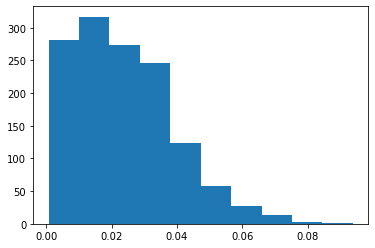

In [186]:
plt.hist(degs.values(), bins=10)

In [187]:
betw = nx.centrality.betweenness_centrality(G1)

In [188]:
betw

{'Bad breath, Change in vision, Depressed mood and Dry mouth': 0.010223955791326818,
 'Binge drinking, Excessive body hair growth, Fatigue, Hunger': 0.001908474577540429,
 'Blackouts (memory time loss), Depressed mood, Fits of rage and Headache': 0.0017944248394646846,
 'Blackouts, Depressed mood, insomnia, Flashbacks': 0.0014573155343192033,
 'Blank stare, Depressed mood, Flashbacks and Headache (worst ever)': 0.002065586972390024,
 'Bleeding, Body aches or pains, Depressed mood and Headache': 0.0017944248394646846,
 'Bleeding, Depressed mood, Emotional detachment and Flashbacks': 0.0024046870244811267,
 'Blinking eyes, Confusion, Depressed mood and Difficulty sleeping': 0.001071967915094401,
 'Blinking eyes, Difficulty falling asleep, insomnia and Staying asleep': 0.0013982597766869962,
 'Blinking eyes, Jaw Clicking, Coated tongue and Depressed mood': 0.0017779703160798587,
 'Bloating or fullness, Constipation, Difficulty sleeping and Early morning waking': 0.0,
 'Bloating or fullnes

In [39]:
import matplotlib.pylab as plt

(array([327.,  23.,  10.,  17.,  12.,  17.,   4.,  54.,  97.,  13.]),
 array([0.        , 0.03926702, 0.07853403, 0.11780105, 0.15706806,
        0.19633508, 0.23560209, 0.27486911, 0.31413613, 0.35340314,
        0.39267016]),
 <a list of 10 Patch objects>)

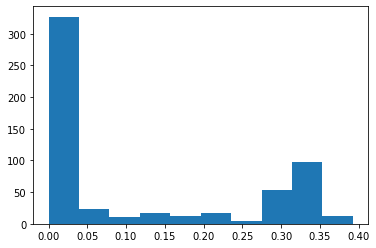

In [40]:
plt.hist(degs.values(), bins=10)

In [189]:
betw = nx.centrality.betweenness_centrality(G1)

In [190]:
sorted(betw, key = lambda p : betw[p])[-5:]

['Bloating, Nausea or vomiting, Stomach cramps and Upset stomach',
 'Bloody Sputum',
 'Bloating, Diarrhea and Stomach cramps',
 'Bumps on Skin',
 'Blurred Vision']

In [191]:
close = nx.centrality.closeness_centrality(G1)

In [192]:
sorted(close, key = lambda p : close[p])[-5:]

['Brittle hair, Change in hair texture, Dry skin and Fatigue',
 'Brittle hair, Change in hair texture, Coarse hair and Dry skin',
 'Body aches or pains, Fatigue, Tires quickly and Weight loss (unintentional)',
 'Brittle hair, Dry skin (General), Dry skin (Skin) and Fatigue',
 'Blurred Vision']

In [193]:
prank = nx.pagerank(G1) # mide la importancia según la importancia de los vecinos

In [194]:
sorted(prank, key = lambda p : prank[p])[-5:]

['Brittle hair, Change in hair texture, Hair loss and Pain or discomfort',
 'Brittle hair, Change in hair texture, Coarse hair and Dry skin',
 'Back Pain',
 'Bumps on Skin',
 'Blurred Vision']

In [195]:
core1 = core1 = nx.k_core(G1, 1) # conjunto de nodos en los que hay al menos 1 conexión

In [196]:
core1

In [197]:
core1.nodes

NodeView(('Bad breath, Change in vision, Depressed mood and Dry mouth', 'Binge drinking, Excessive body hair growth, Fatigue, Hunger', 'Blackouts (memory time loss), Depressed mood, Fits of rage and Headache', 'Blackouts, Depressed mood, insomnia, Flashbacks', 'Blank stare, Depressed mood, Flashbacks and Headache (worst ever)', 'Bleeding, Body aches or pains, Depressed mood and Headache', 'Bleeding, Depressed mood, Emotional detachment and Flashbacks', 'Blinking eyes, Confusion, Depressed mood and Difficulty sleeping', 'Blinking eyes, Difficulty falling asleep, insomnia and Staying asleep', 'Blinking eyes, Jaw Clicking, Coated tongue and Depressed mood', 'Bloating or fullness, Constipation, Difficulty sleeping and Early morning waking', 'Bloating or fullness, Depressed mood, Distended stomach and Fatigue', 'Bloating or fullness, Headache and Mood swings', 'Bloating or fullness, Headache, Missed or late menstrual period and Mood swings', 'Bloating, Early morning waking and Frequent urin

In [198]:
core2 = nx.k_core(G1, 2)
core2.nodes()

NodeView(('Bad breath, Change in vision, Depressed mood and Dry mouth', 'Binge drinking, Excessive body hair growth, Fatigue, Hunger', 'Blackouts (memory time loss), Depressed mood, Fits of rage and Headache', 'Blackouts, Depressed mood, insomnia, Flashbacks', 'Blank stare, Depressed mood, Flashbacks and Headache (worst ever)', 'Bleeding, Body aches or pains, Depressed mood and Headache', 'Bleeding, Depressed mood, Emotional detachment and Flashbacks', 'Blinking eyes, Confusion, Depressed mood and Difficulty sleeping', 'Blinking eyes, Difficulty falling asleep, insomnia and Staying asleep', 'Blinking eyes, Jaw Clicking, Coated tongue and Depressed mood', 'Bloating or fullness, Constipation, Difficulty sleeping and Early morning waking', 'Bloating or fullness, Depressed mood, Distended stomach and Fatigue', 'Bloating or fullness, Headache and Mood swings', 'Bloating or fullness, Headache, Missed or late menstrual period and Mood swings', 'Bloating, Early morning waking and Frequent urin

In [199]:
core8 = nx.k_core(G1, 8)
core8.nodes()

NodeView(('Bad breath, Change in vision, Depressed mood and Dry mouth', 'Binge drinking, Excessive body hair growth, Fatigue, Hunger', 'Blackouts (memory time loss), Depressed mood, Fits of rage and Headache', 'Blackouts, Depressed mood, insomnia, Flashbacks', 'Blank stare, Depressed mood, Flashbacks and Headache (worst ever)', 'Bleeding, Body aches or pains, Depressed mood and Headache', 'Bleeding, Depressed mood, Emotional detachment and Flashbacks', 'Blinking eyes, Confusion, Depressed mood and Difficulty sleeping', 'Blinking eyes, Difficulty falling asleep, insomnia and Staying asleep', 'Blinking eyes, Jaw Clicking, Coated tongue and Depressed mood', 'Bloating or fullness, Constipation, Difficulty sleeping and Early morning waking', 'Bloating or fullness, Depressed mood, Distended stomach and Fatigue', 'Bloating or fullness, Headache and Mood swings', 'Bloating or fullness, Headache, Missed or late menstrual period and Mood swings', 'Bloating, Early morning waking and Frequent urin

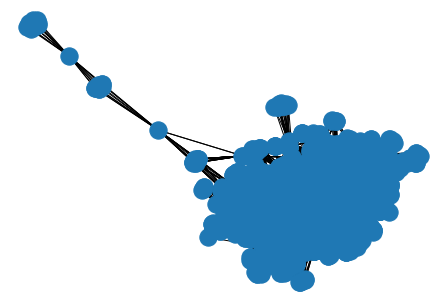

In [200]:
nx.draw_spring(core8)

In [203]:
core40 = nx.k_core(G1, 30)
core40.nodes()

NodeView(('Blood in toilet, Blood on stool surface, Decreased appetite and Fatigue', 'Blurred vision and Nosebleed', 'Bulging veins, Enlarged (dilated) veins and Pain or discomfort', 'Bruising, Difficulty swallowing, Enlarged glands and Sore throat', 'Body aches or pains, Cough, Muscle stiffness (rigidity) and Muscle weakness', 'Blurred vision and Excessive sweating', 'Brittle hair, Change in hair texture, Hair loss and Pain or discomfort', 'Bad breath, Bad taste in mouth, Bloating or fullness and Joint pain', 'Bruising or discoloration, Nasal congestion, Pain or discomfort and Runny nose', 'Broken bone (single fracture), Numbness or tingling and Pain or discomfort', 'Bruising and Cough', 'Body aches or pains, Dizziness, Easy bruising and Enlarged or swollen glands', 'Blank stare, Blurred vision, Cloudy vision and Depressed mood', 'Blindness, Change in vision, Constipation and Dizziness', 'Bad breath, Bad taste in mouth, Drainage or pus and Fruity odor on breath', 'Body aches or pains,

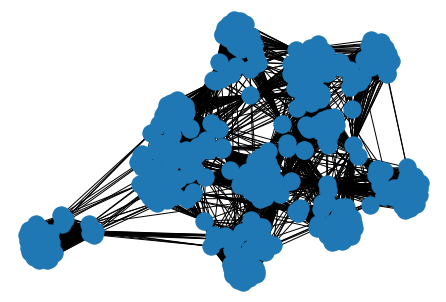

In [204]:
nx.draw_spring(core40)

In [206]:
core_numbers = nx.core_number(G1)

In [207]:
core_numbers

{'Bad breath, Change in vision, Depressed mood and Dry mouth': 41,
 'Binge drinking, Excessive body hair growth, Fatigue, Hunger': 21,
 'Blackouts (memory time loss), Depressed mood, Fits of rage and Headache': 22,
 'Blackouts, Depressed mood, insomnia, Flashbacks': 18,
 'Blank stare, Depressed mood, Flashbacks and Headache (worst ever)': 18,
 'Bleeding, Body aches or pains, Depressed mood and Headache': 22,
 'Bleeding, Depressed mood, Emotional detachment and Flashbacks': 22,
 'Blinking eyes, Confusion, Depressed mood and Difficulty sleeping': 18,
 'Blinking eyes, Difficulty falling asleep, insomnia and Staying asleep': 18,
 'Blinking eyes, Jaw Clicking, Coated tongue and Depressed mood': 18,
 'Bloating or fullness, Constipation, Difficulty sleeping and Early morning waking': 18,
 'Bloating or fullness, Depressed mood, Distended stomach and Fatigue': 18,
 'Bloating or fullness, Headache and Mood swings': 28,
 'Bloating or fullness, Headache, Missed or late menstrual period and Mood sw

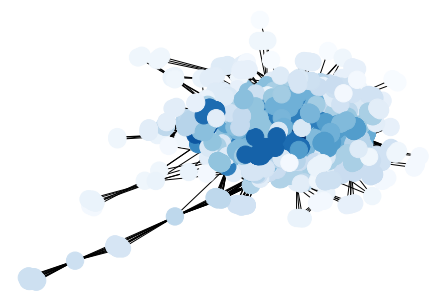

In [208]:
nx.draw_spring(G1, nodelist=list(core_numbers.keys()),
              node_color = list(core_numbers.values()),
              cmap = plt.cm.Blues)

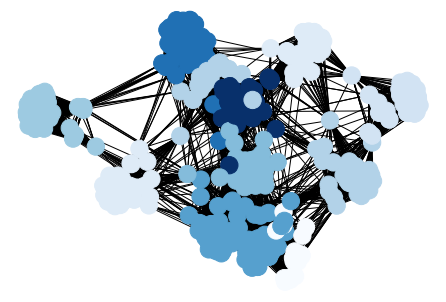

In [209]:
subG = nx.subgraph(G1, [k for k in core_numbers if core_numbers[k] >=30])
core_numbers_sub = nx.core_number(subG)
nx.draw_spring(subG,
                    nodeList = list(core_numbers_sub.keys()),
                    node_color = list(core_numbers_sub.values()),
                    cmap=plt.cm.Blues)

In [210]:
comps = nx.k_components(G1)

KeyboardInterrupt: 

In [ ]:
comps # caminos independientes entre los nodos, los nodos pueden estar en componentes distintas, relación no transitiva

In [211]:
communities = nx.algorithms.community.greedy_modularity_communities(G1)

In [212]:
communities # 3 comunidades

[frozenset({'Bad breath, Confusion, Depressed mood and Difficulty concentrating',
            'Bad breath, Hot and dry skin',
            'Bad taste in mouth and Fatigue',
            'Bad taste in mouth, Bleeding gums, Dry eyes and Dry mouth',
            'Bad taste in mouth, Dizziness, Excessive crying and Fatigue',
            'Bad taste in mouth, Dry mouth, Metallic taste and Pain',
            'Bald spots (hair) and Change in hair texture',
            'Bald spots (hair) and Erectile dysfunction',
            'Bald spots (hair), Blue colored skin, Blue colored lips and Brittle hair',
            'Bald spots (hair), Blue colored skin, Change in hair texture and Color change',
            'Bald spots (hair), Brittle hair, Fits of rage and Hair loss',
            'Bald spots (hair), Brittle hair, Hair loss and Itching or burning',
            'Bald spots (hair), Drainage or pus, Hair loss, Lump or bulge',
            'Bald spots (hair), Dry skin, Hair loss and Itching or burning',
  

In [213]:
dict_comm = {}
for (i, community) in enumerate(communities):
    for character in community:
        dict_comm[character] = i

In [214]:
%matplotlib inline

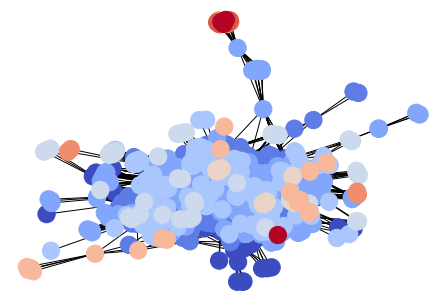

In [215]:
nx.draw_spring(G1, nodeList = list(dict_comm.keys()),
                    node_color = list(dict_comm.values()),
                    cmap=plt.cm.coolwarm)

## Subgrafo 2

In [216]:
G2 = subG = nx.subgraph(G, cc[1])

In [217]:
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 35
Number of edges: 118
Average degree:   6.7429


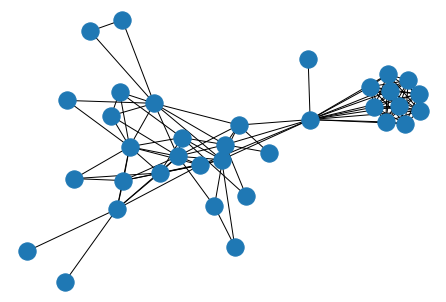

In [218]:
nx.draw_spring(G2)

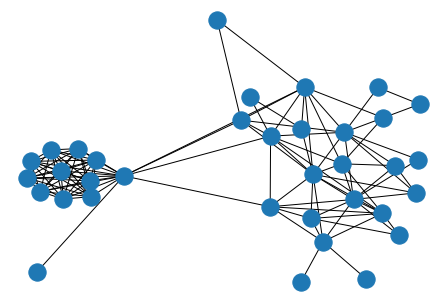

In [219]:
nx.draw_kamada_kawai(G2)

In [220]:
nx.is_connected(G2)

True

In [221]:
nx.diameter(G2) 

4

In [222]:
list(nx.articulation_points(G2))

['Dysphagia', 'Decreased Appetite', 'Delirium']

In [223]:
list(nx.bridges(G2))

[('Delirium', 'Disorganized Speech'),
 ('Delirium', 'Delusions'),
 ('Dark Urine', 'Decreased Appetite')]

In [224]:
nx.clustering(G2) # coef. alto -> personajes que intervienen en un triangulo

{'Diogenes Syndrome (Self-Neglect)': 1.0,
 'Dyspepsia': 0.6,
 'Delirium': 0.47619047619047616,
 'Depression': 0.4166666666666667,
 'Dizziness': 0.3939393939393939,
 'Dysphagia': 0.28888888888888886,
 'Difficulty swallowing, Nausea or vomiting and Sore throat': 1.0,
 'Difficulty With Speech': 0.38181818181818183,
 'Difficulty swallowing, Headache, Nausea or vomiting and Pain or discomfort': 1.0,
 'Dry Mouth': 0.3333333333333333,
 'Difficulty swallowing, Dizziness, Fatigue and Headache': 1.0,
 'Difficulty swallowing, Enlarged glands and Muffled voice': 1.0,
 'Distended Stomach (Abdominal Distention)': 1.0,
 'Difficulty Urinating': 1.0,
 'Difficulty swallowing, Headache, Lightheadedness and Nausea or vomiting': 1.0,
 'Diarrhea': 0.3611111111111111,
 'Dizziness, Joint aches and Nausea or vomiting': 1.0,
 'Double Vision': 0.42857142857142855,
 'Decreased appetite, Fatigue, Fever and Headache': 1.0,
 'Dark Urine': 0,
 'Decreased Appetite': 0.4666666666666667,
 'Drooling': 0.8333333333333334,

In [225]:
nx.transitivity(G2) # no es aleatoria, es red social

0.7196162046908315

In [226]:
degs2 = nx.centrality.degree_centrality(G2)

In [227]:
degs2

{'Diogenes Syndrome (Self-Neglect)': 0.08823529411764705,
 'Dyspepsia': 0.1764705882352941,
 'Delirium': 0.20588235294117646,
 'Depression': 0.2647058823529412,
 'Dizziness': 0.3529411764705882,
 'Dysphagia': 0.29411764705882354,
 'Difficulty swallowing, Nausea or vomiting and Sore throat': 0.29411764705882354,
 'Difficulty With Speech': 0.3235294117647059,
 'Difficulty swallowing, Headache, Nausea or vomiting and Pain or discomfort': 0.29411764705882354,
 'Dry Mouth': 0.08823529411764705,
 'Difficulty swallowing, Dizziness, Fatigue and Headache': 0.29411764705882354,
 'Difficulty swallowing, Enlarged glands and Muffled voice': 0.29411764705882354,
 'Distended Stomach (Abdominal Distention)': 0.058823529411764705,
 'Difficulty Urinating': 0.058823529411764705,
 'Difficulty swallowing, Headache, Lightheadedness and Nausea or vomiting': 0.29411764705882354,
 'Diarrhea': 0.2647058823529412,
 'Dizziness, Joint aches and Nausea or vomiting': 0.29411764705882354,
 'Double Vision': 0.20588235

In [228]:
max(degs2, key = lambda p : degs2[p])

'Decreased Appetite'

In [229]:
sorted(degs2, key = lambda p : degs2[p])[-5:]

['Decreased appetite, Hyperactive behavior, Increased thirst and Joint aches',
 'Decreased appetite and Fatigue',
 'Difficulty With Speech',
 'Dizziness',
 'Decreased Appetite']

(array([ 9.,  2.,  2.,  2.,  3.,  3., 11.,  2.,  0.,  1.]),
 array([0.02941176, 0.07058824, 0.11176471, 0.15294118, 0.19411765,
        0.23529412, 0.27647059, 0.31764706, 0.35882353, 0.4       ,
        0.44117647]),
 <a list of 10 Patch objects>)

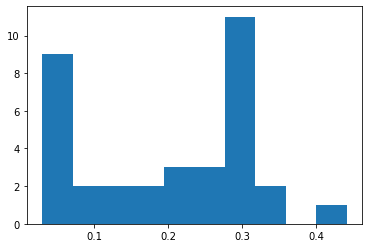

In [230]:
plt.hist(degs2.values(), bins=10)

In [231]:
betw2 = nx.centrality.betweenness_centrality(G2)

In [232]:
sorted(betw2, key = lambda p : betw2[p])[-5:]

['Depression',
 'Diarrhea',
 'Distractibility',
 'Dysphagia',
 'Decreased Appetite']

In [233]:
close2 = nx.centrality.closeness_centrality(G2)

In [234]:
sorted(close2, key = lambda p : close2[p])[-5:]

['Dyspepsia',
 'Distractibility',
 'Diarrhea',
 'Depression',
 'Decreased Appetite']

In [235]:
prank2 = nx.pagerank(G2) # mide la importancia según la importancia de los vecinos

In [236]:
sorted(prank2, key = lambda p : prank2[p])[-5:]

['Difficulty Concentrating',
 'Difficulty With Speech',
 'Decreased Appetite',
 'Diarrhea',
 'Dizziness']

In [237]:
core2_1 = core2_1 = nx.k_core(G2, 1) # conjunto de nodos en los que hay al menos 1 conexión

In [238]:
core2_1.nodes

NodeView(('Diogenes Syndrome (Self-Neglect)', 'Dyspepsia', 'Delirium', 'Depression', 'Dizziness', 'Dysphagia', 'Difficulty swallowing, Nausea or vomiting and Sore throat', 'Difficulty With Speech', 'Difficulty swallowing, Headache, Nausea or vomiting and Pain or discomfort', 'Dry Mouth', 'Difficulty swallowing, Dizziness, Fatigue and Headache', 'Difficulty swallowing, Enlarged glands and Muffled voice', 'Distended Stomach (Abdominal Distention)', 'Difficulty Urinating', 'Difficulty swallowing, Headache, Lightheadedness and Nausea or vomiting', 'Diarrhea', 'Dizziness, Joint aches and Nausea or vomiting', 'Double Vision', 'Decreased appetite, Fatigue, Fever and Headache', 'Dark Urine', 'Decreased Appetite', 'Drooling', 'Disorganized Speech', 'Difficulty swallowing, Stiff neck, Swelling and Throat tightness', 'Distractibility', 'Decreased appetite, Fatigue, Nausea or vomiting, Generalized weakness', 'Decreased appetite, Hyperactive behavior, Increased thirst and Joint aches', 'Dry Skin', 

In [239]:
core2_2 = nx.k_core(G2, 2)
core2_2.nodes()

NodeView(('Diogenes Syndrome (Self-Neglect)', 'Dyspepsia', 'Delirium', 'Depression', 'Dizziness', 'Dysphagia', 'Difficulty swallowing, Nausea or vomiting and Sore throat', 'Difficulty With Speech', 'Difficulty swallowing, Headache, Nausea or vomiting and Pain or discomfort', 'Dry Mouth', 'Difficulty swallowing, Dizziness, Fatigue and Headache', 'Difficulty swallowing, Enlarged glands and Muffled voice', 'Distended Stomach (Abdominal Distention)', 'Difficulty Urinating', 'Difficulty swallowing, Headache, Lightheadedness and Nausea or vomiting', 'Diarrhea', 'Dizziness, Joint aches and Nausea or vomiting', 'Double Vision', 'Decreased appetite, Fatigue, Fever and Headache', 'Decreased Appetite', 'Drooling', 'Difficulty swallowing, Stiff neck, Swelling and Throat tightness', 'Distractibility', 'Decreased appetite, Fatigue, Nausea or vomiting, Generalized weakness', 'Decreased appetite, Hyperactive behavior, Increased thirst and Joint aches', 'Dry Skin', 'Difficulty swallowing, Swelling and 

In [240]:
core2_8 = nx.k_core(G2, 8)
core2_8.nodes()

NodeView(('Decreased Appetite', 'Decreased appetite, Fatigue, Fever and Headache', 'Decreased appetite and Fatigue', 'Difficulty swallowing, Enlarged glands and Muffled voice', 'Difficulty swallowing, Nausea or vomiting and Sore throat', 'Decreased appetite, Fatigue, Nausea or vomiting, Generalized weakness', 'Difficulty swallowing, Headache, Lightheadedness and Nausea or vomiting', 'Decreased appetite, Hyperactive behavior, Increased thirst and Joint aches', 'Dizziness, Joint aches and Nausea or vomiting', 'Difficulty swallowing, Headache, Nausea or vomiting and Pain or discomfort', 'Difficulty swallowing, Dizziness, Fatigue and Headache'))

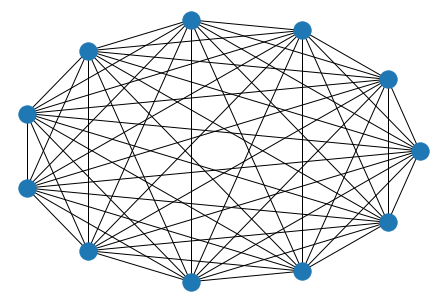

In [241]:
nx.draw_kamada_kawai(core2_8)

In [242]:
core_numbers2 = nx.core_number(G2)

In [243]:
core_numbers2

{'Diogenes Syndrome (Self-Neglect)': 3,
 'Dyspepsia': 5,
 'Delirium': 5,
 'Depression': 5,
 'Dizziness': 5,
 'Dysphagia': 5,
 'Difficulty swallowing, Nausea or vomiting and Sore throat': 10,
 'Difficulty With Speech': 5,
 'Difficulty swallowing, Headache, Nausea or vomiting and Pain or discomfort': 10,
 'Dry Mouth': 2,
 'Difficulty swallowing, Dizziness, Fatigue and Headache': 10,
 'Difficulty swallowing, Enlarged glands and Muffled voice': 10,
 'Distended Stomach (Abdominal Distention)': 2,
 'Difficulty Urinating': 2,
 'Difficulty swallowing, Headache, Lightheadedness and Nausea or vomiting': 10,
 'Diarrhea': 5,
 'Dizziness, Joint aches and Nausea or vomiting': 10,
 'Double Vision': 5,
 'Decreased appetite, Fatigue, Fever and Headache': 10,
 'Dark Urine': 1,
 'Decreased Appetite': 10,
 'Drooling': 4,
 'Disorganized Speech': 1,
 'Difficulty swallowing, Stiff neck, Swelling and Throat tightness': 2,
 'Distractibility': 5,
 'Decreased appetite, Fatigue, Nausea or vomiting, Generalized we

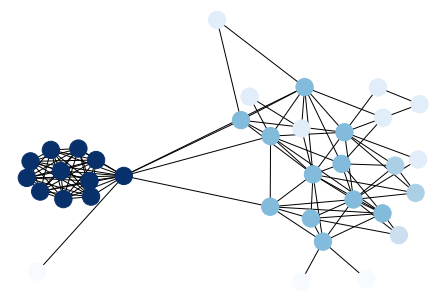

In [244]:
nx.draw_kamada_kawai(G2, nodelist=list(core_numbers2.keys()),
              node_color = list(core_numbers2.values()),
              cmap = plt.cm.Blues)

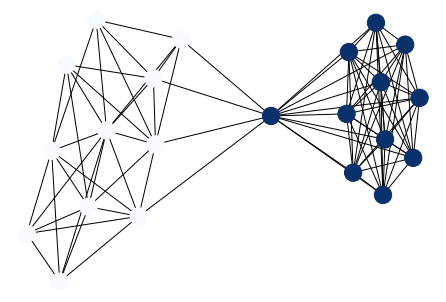

In [245]:
subG_2 = nx.subgraph(G2, [k for k in core_numbers2 if core_numbers2[k] >=5])
core_numbers_sub_2 = nx.core_number(subG_2)
nx.draw_spring(subG_2,
                    nodeList = list(core_numbers_sub_2.keys()),
                    node_color = list(core_numbers_sub_2.values()),
                    cmap=plt.cm.Blues)

In [246]:
comps2 = nx.k_components(G2)

In [247]:
comps2 # caminos independientes entre los nodos, los nodos pueden estar en componentes distintas, relación no transitiva

{10: [{'Decreased Appetite',
   'Decreased appetite and Fatigue',
   'Decreased appetite, Fatigue, Fever and Headache',
   'Decreased appetite, Fatigue, Nausea or vomiting, Generalized weakness',
   'Decreased appetite, Hyperactive behavior, Increased thirst and Joint aches',
   'Difficulty swallowing, Dizziness, Fatigue and Headache',
   'Difficulty swallowing, Enlarged glands and Muffled voice',
   'Difficulty swallowing, Headache, Lightheadedness and Nausea or vomiting',
   'Difficulty swallowing, Headache, Nausea or vomiting and Pain or discomfort',
   'Difficulty swallowing, Nausea or vomiting and Sore throat',
   'Dizziness, Joint aches and Nausea or vomiting'}],
 9: [{'Decreased Appetite',
   'Decreased appetite and Fatigue',
   'Decreased appetite, Fatigue, Fever and Headache',
   'Decreased appetite, Fatigue, Nausea or vomiting, Generalized weakness',
   'Decreased appetite, Hyperactive behavior, Increased thirst and Joint aches',
   'Difficulty swallowing, Dizziness, Fatigue 

In [248]:
communities2 = nx.algorithms.community.greedy_modularity_communities(G2)

In [249]:
communities2

[frozenset({'Delirium',
            'Delusions',
            'Depression',
            'Diarrhea',
            'Difficulty Concentrating',
            'Difficulty Urinating',
            'Difficulty With Speech',
            'Difficulty swallowing, Stiff neck, Swelling and Throat tightness',
            'Difficulty swallowing, Swelling and Throat tightness',
            'Dilated Pupils (Mydriasis)',
            'Diogenes Syndrome (Self-Neglect)',
            'Disorganized Speech',
            'Distended Stomach (Abdominal Distention)',
            'Distractibility',
            'Dizziness',
            'Double Vision',
            'Drooling',
            'Dry Eye',
            'Dry Mouth',
            'Dry Skin',
            'Dysarthria',
            'Dyspepsia',
            'Dysphagia'}),
 frozenset({'Dark Urine',
            'Decreased Appetite',
            'Decreased appetite and Fatigue',
            'Decreased appetite, Fatigue, Fever and Headache',
            'Decreased appetit

In [250]:
dict_comm2 = {}
for (i, community) in enumerate(communities2):
    for character in community:
        dict_comm2[character] = i

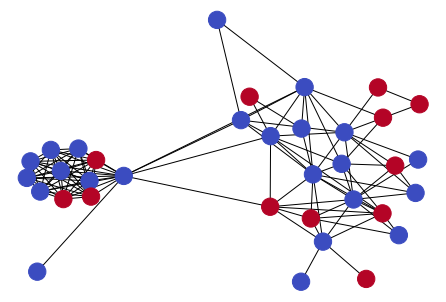

In [251]:
nx.draw_kamada_kawai(G2, nodeList = list(dict_comm2.keys()),
                    node_color = list(dict_comm2.values()),
                    cmap=plt.cm.coolwarm)